# L'attrattore di Lorenz

\begin{equation}
\begin{cases}
\dot x &= \sigma(y-x) \\
\dot y &= r x - y - xz \\
\dot z &= xy - bz
\end{cases}
\end{equation}

Faremo la scelta di Lorenz prendendo
$$
\sigma = 10 , \ \ \ b = \frac{8}{3}
$$
e facendo variare $r$

In [49]:
import numpy as np                                  # libreria matematica
import scipy as sp
import matplotlib.pyplot as plt  # librerie grafiche

import matplotlib.animation as animation

from scipy.integrate import odeint                  # altra libreria matematica    odeint e' per integrare le equazioni
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline

from ipywidgets import interactive, fixed

In [50]:
# fissiamo i parametri
sigma = 10.0
b = 8.0/3.0

# definiamo la funzione campo vettoriale
def vf(f, t, sigma, b, r):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, y, z = f[0], f[1], f[2]
    
    dx = sigma*(y-x)
    dy = r*x - y- x*z
    dz = x*y - b*z

    return [dx, dy, dz]



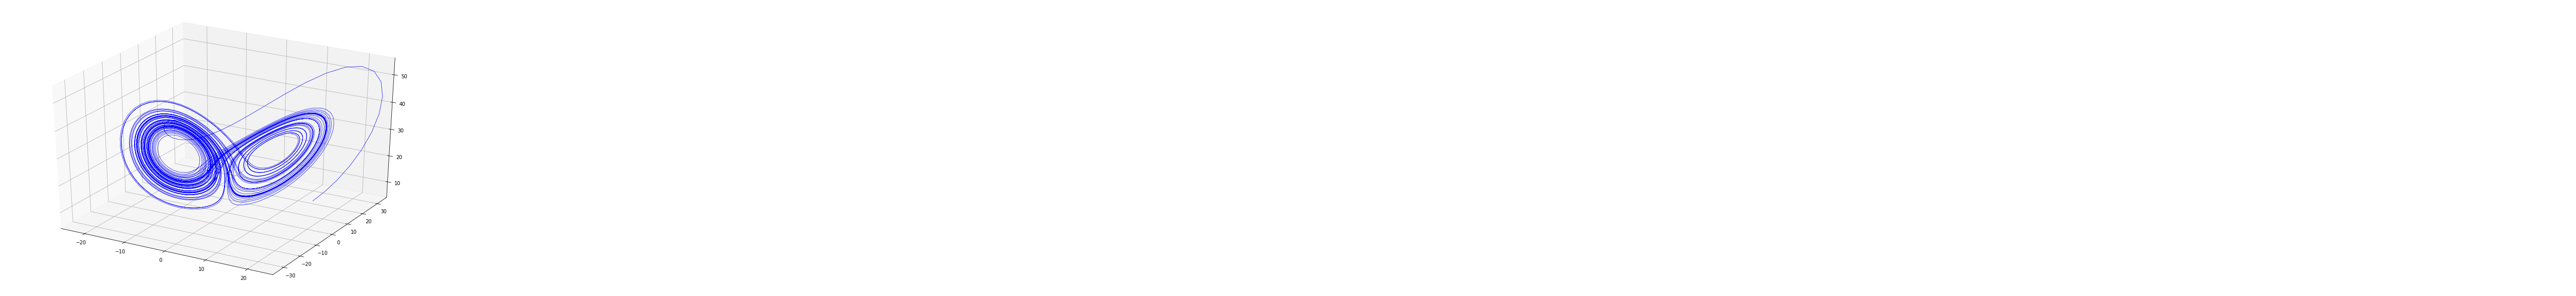

In [51]:


# initial state: 
z0 = [10.0, 30.0, 0.0]


# se r <1 ho 1 solo punto di equilibrio, nodo stabile
#r = 0.5

#se 1 < r < r_* ho biforcazione e si creano due punti di equilibrio, fuochi stabili
#r = 10.0

# se r grande...
r=28.0

# time coodinate to solve the ODE for
time = np.linspace(0, 60, 6000)


# to integrate, we pass to odeint the vector field, the initial datum and the time vectors
zt = odeint(vf, z0, time, args=(sigma,b,r))    


# plottiamo

fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('on')

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

lines = ax.plot(zt[:,0], zt[:,1], zt[:,2], 'b-', linewidth=0.7)
#plt.setp(lines, linewidth=2)
#angle = 104
#ax.view_init(30, angle)
plt.show()



Esistono anche orbite periodiche! Alcune sono descritte in questo [link](http://www.math.lsa.umich.edu/~divakar/Viswanath2003-LorenzSymDyn.pdf)


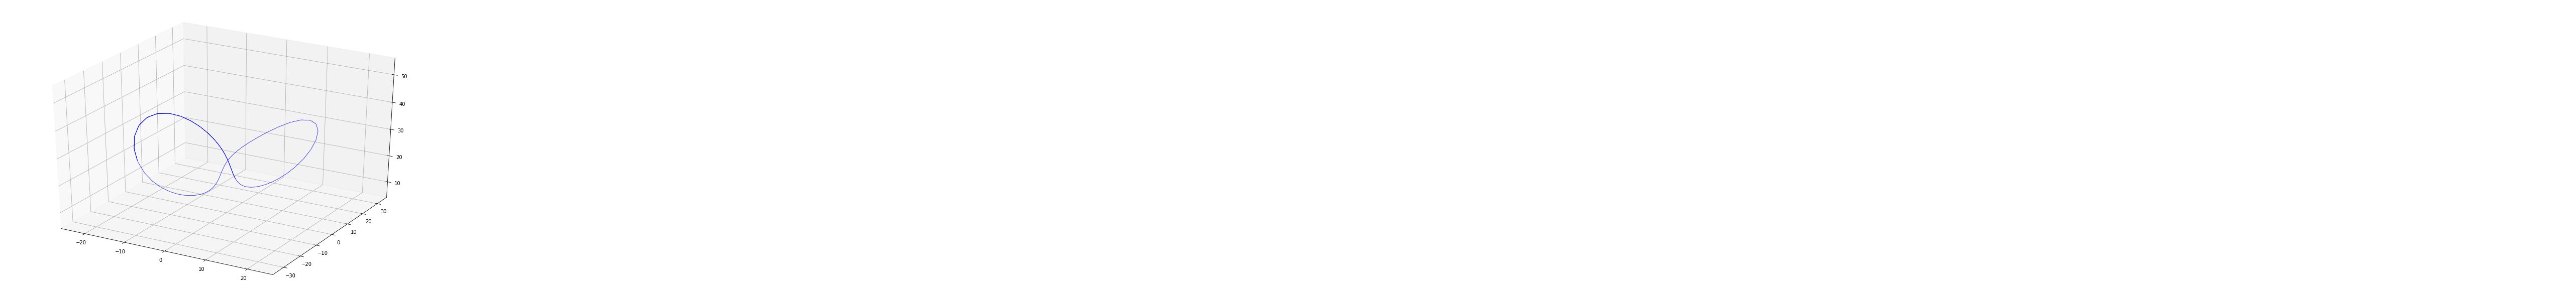

In [52]:


#fisso il valore r
r=28.0


# initial state: 

#AB
z0 = [-13.763610682134, -19.578751942452, 27.0]
time = np.linspace(0, 2, 100)

#AAB
#z0=[-12.595115397689,  -16.970525307084, 27.0]
#time = np.linspace(0, 4, 300)

#AABAB
#z0=[-12.698941349915,  -17.197497247713, 27.0]
#time = np.linspace(0, 4, 300)





# to integrate, we pass to odeint the vector field, the initial datum and the time vectors
zt = odeint(vf, z0, time, args=(sigma,b,r))    


# plottiamo

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('on')

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

lines = ax.plot(zt[:,0], zt[:,1], zt[:,2], 'b-', linewidth=0.7)
#plt.setp(lines, linewidth=2)
#angle = 104
#ax.view_init(30, angle)
plt.show()

>The Lorenz equations do not have periodic orbits with the symbol sequence A or with the
symbol sequence B. Excluding these, there are in all 111011 symbol sequences of length 20
or less that can represent distinct periodic orbits. 





Adesso guardiamo come evolvono tanti punti diversi

In [53]:
def solve_lorenz(sigma=10.0, beta=8./3, rho=28.0):
    """Plot a solution to the Lorenz differential equations."""

    max_time = 10.0
    N = 10

    fig = plt.figure(figsize=(12,8))
    plt.rcParams['figure.figsize'] = [18, 14]
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('on')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 +   np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)
    
    plt.show()




w=interactive(solve_lorenz,sigma=(0.0,50.0),rho=(0.0,50.0))
w

interactive(children=(FloatSlider(value=10.0, description='sigma', max=50.0), FloatSlider(value=2.666666666666…

Esploriamo ancora un po': proviamo a plottare la componente $x(t)$ della soluzione in funzione del tempo

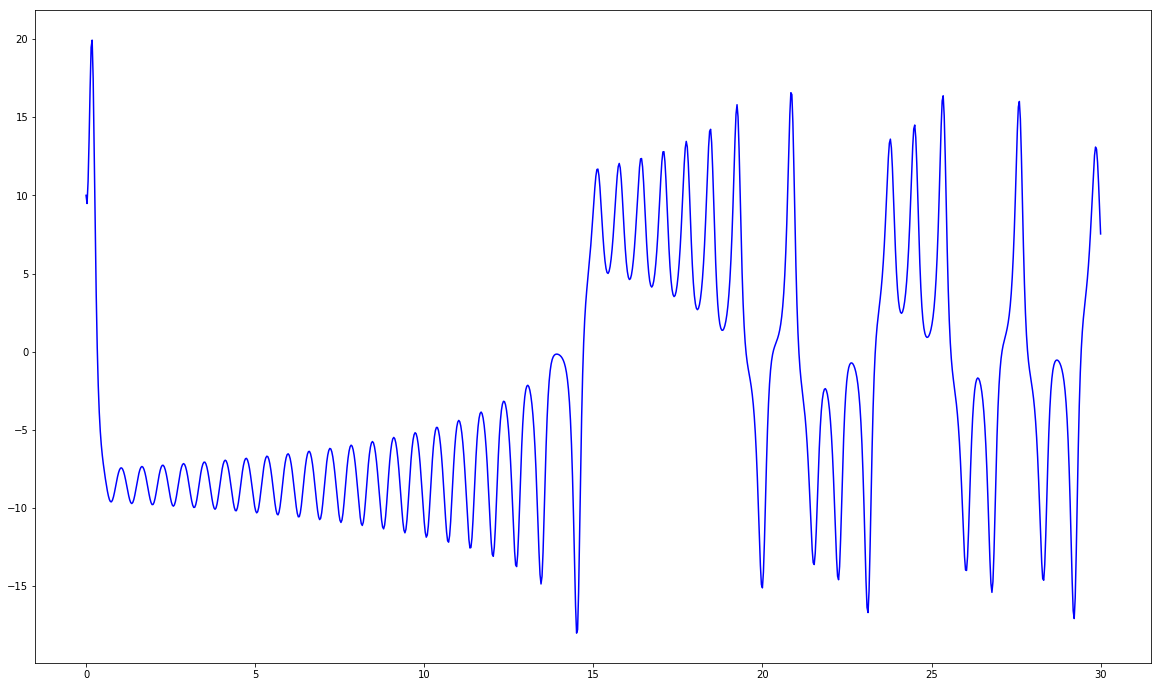

In [54]:
%matplotlib inline


# initial state: 
z0 = [10.0, 4.0, 1.0]

r=28.5

# time coodinate to solve the ODE for
time = np.linspace(0, 30, 1000)

# to integrate, we pass to odeint the vector field, the initial datum and the time vectors
zt = odeint(vf, z0, time, args=(sigma,b,r))    


fig = plt.figure(figsize=(20,12))
x_lines = plt.plot(time, zt[:,0], 'b-')

plt.show()

Cosa succede se  plottiamo due dati iniziali molto vicini?

<IPython.core.display.Javascript object>


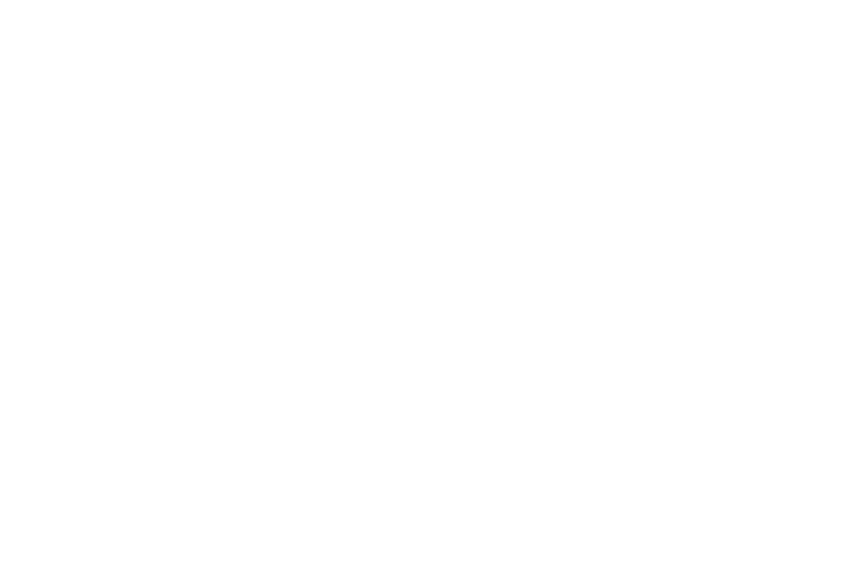

<IPython.core.display.Javascript object>


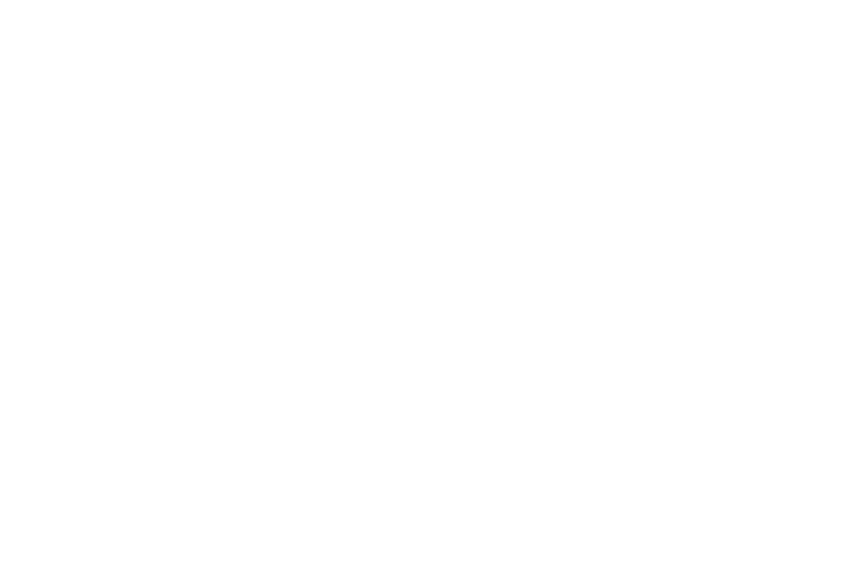

Traceback (most recent call last):
  File "/Users/albertomaspero/Library/Python/3.7/lib/python/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/Users/albertomaspero/Library/Python/3.7/lib/python/site-packages/matplotlib/animation.py", line 1462, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [56]:
from IPython.display import HTML


# initial state: 
z0 = [10.0, 10.0, 5.0]
z1 = [10.5, 10.0, 5.0]

r=28.5

# time coodinate to solve the ODE for
time = np.linspace(0, 30, 1000)

# to integrate, we pass to odeint the vector field, the initial datum and the time vectors
zt = odeint(vf, z0, time, args=(sigma,b,r))    
zt1 = odeint(vf, z1, time, args=(sigma,b,r))    

fig = plt.figure(figsize=(12,8))
fft_axes = fig.add_subplot(111)
fft_axes.set_xlim([0,30])
fft_axes.set_ylim([-20, 20])

def animate(i):
    x_lines = plt.plot(time[0:i], zt[0:i,0], 'b-')
    x_lines1 = plt.plot(time[0:i], zt1[0:i,0], 'r-')


ani = animation.FuncAnimation(fig, animate, frames=len(time/2))

#plt.plot(time, zt[:,0], 'b-')
#plt.plot(time, zt1[:,0], 'r-')

plt.show()

Infine guardiamo la simulazione seguente [http://www.malinc.se/m/Lorenz.php](http://www.malinc.se/m/Lorenz.php)

## Da sistema continuo a mappa discreta

Seguiamo ora un'idea di Lorenz: prendiamo la soluzione e plottiamo $z(t)$

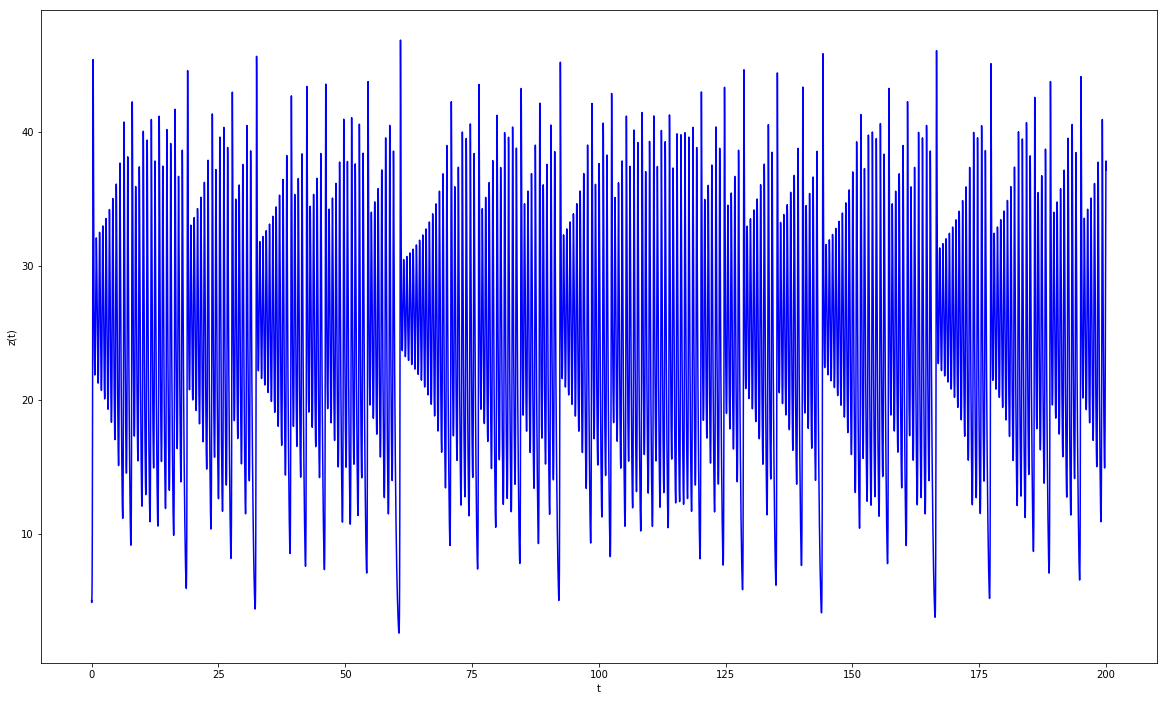

In [61]:
%matplotlib inline


# initial state: 
z0 = [1.0, 5.0, 5.0]

r=28.0

# time coodinate to solve the ODE for
time = np.linspace(0, 200, 100000)

# to integrate, we pass to odeint the vector field, the initial datum and the time vectors
zt = odeint(vf, z0, time, args=(sigma,b,r))    


fig = plt.figure(figsize=(20,12))
plt.plot(time, zt[:,2], 'b-')
plt.xlabel('t')
plt.ylabel('z(t)')

plt.show()

Sembra già esserci più regolarità! Adesso calcoliamo i punti di massimo di questa funzione. Saranno una successione $(z_n)_{n \geq 1}$. Plottiamo nel piano le coppie $(z_{n-1}, z_n)$, cercando di capire se si distribuiscono in qualche tipo di struttura. L'ideale sarebbe capire se esiste una mappa $\Psi$ tale che
\begin{align}
z_{n+1} = \Psi(z_n) \ , \qquad \forall n
\end{align}
e quindi se si riescono a determinare iterativamente

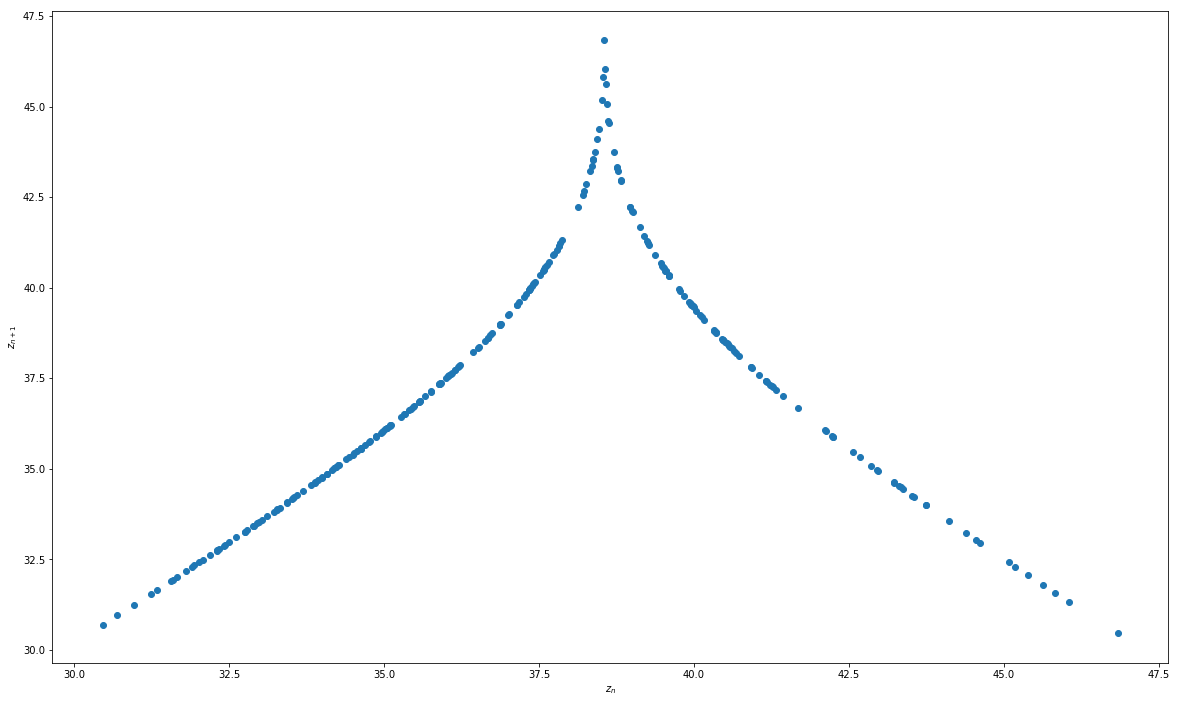

In [62]:
%matplotlib inline
import seaborn

from scipy.signal import argrelextrema

# for local maxima
result = argrelextrema(zt[:,2], np.greater)
z_massimi =  zt[result, 2][0]

fig = plt.figure(figsize=(20,12))
plt.axes()
plt.xlabel('$z_n$')
plt.ylabel('$z_{n+1}$')

plt.plot(z_massimi[:-1], z_massimi[1:], 'o')

#plt.plot([32, 37], [32, 37*1.89 - 31], 'k-')
#plt.plot([39, 44], [ -39*1.8 + 110, -44*1.8 + 110])
plt.show()

# Rossler attractor

$$
\begin{cases}{\frac  {dx}{dt}}=-y-z\\{\frac  {dy}{dt}}=x+ay\\{\frac  {dz}{dt}}=b+z(x-c)\end{cases}
$$

In [40]:
# fissiamo i parametri
a = 0.1
b = 0.1
c = 14.0

# definiamo la funzione campo vettoriale
def vf(f, t, a, b, c):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, y, z = f[0], f[1], f[2]
    
    dx = -y-z
    dy = x +a*y
    dz = b + z*(x-c)

    return [dx, dy, dz]


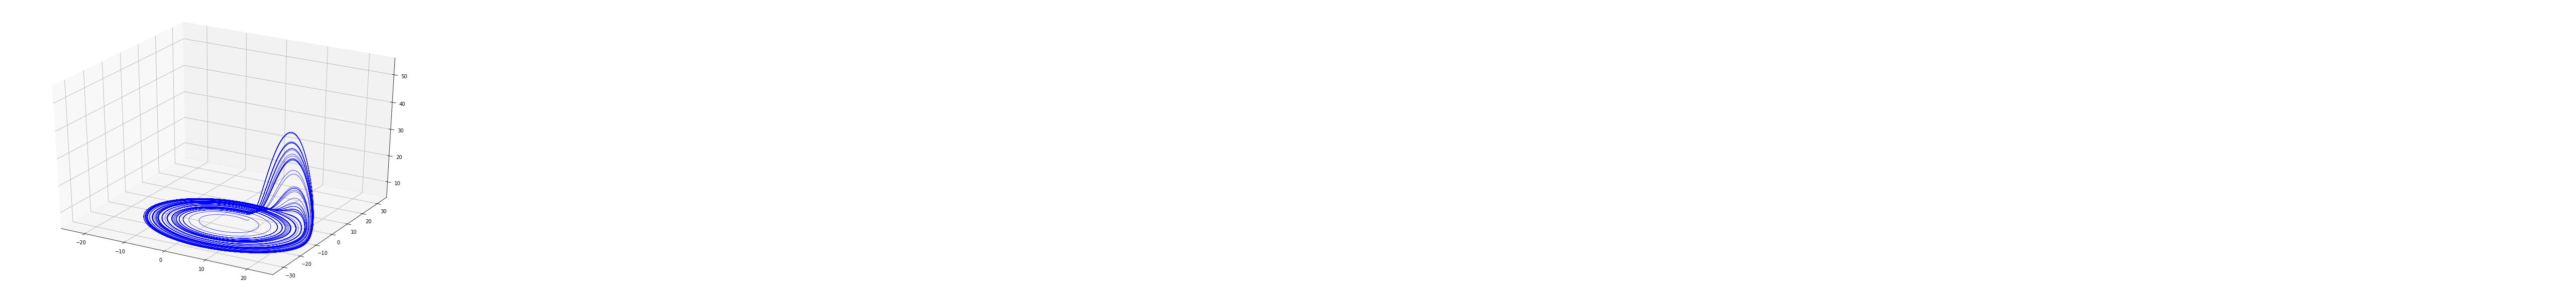

In [46]:

# initial state: 
z0 = [4.0, 4.0, 1.0]


# time coodinate to solve the ODE for
time = np.linspace(0, 400, 100000)


# to integrate, we pass to odeint the vector field, the initial datum and the time vectors
zt = odeint(vf, z0, time, args=(a,b,c))    


# plottiamo

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('on')

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

lines = ax.plot(zt[:,0], zt[:,1], zt[:,2], 'b-', linewidth=0.7)
#plt.setp(lines, linewidth=2)
#angle = 104
#ax.view_init(30, angle)
plt.show()


# Duffing oscillator

$$
\ddot x + a \dot x - x + x^3 = \
$$

$$
\begin{cases}

\end{cases}
$$

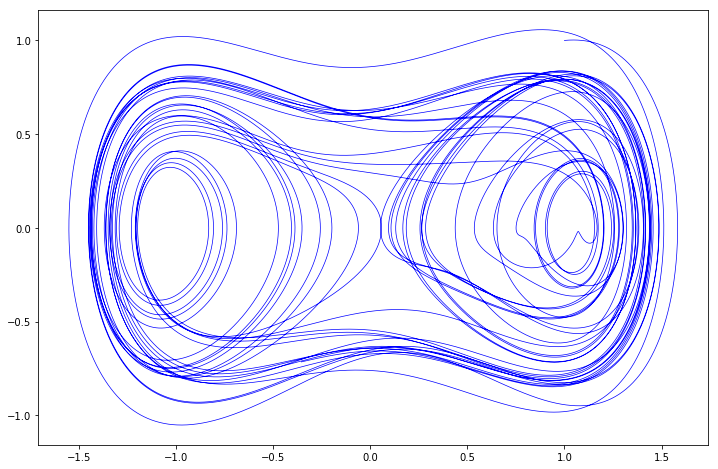

In [84]:

import matplotlib.animation as animation


# fissiamo i parametri
a = 0.2
b = 0.3
c = 1.0

# definiamo la funzione campo vettoriale
def vf(f, t, a, b, c):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, y = f[0], f[1]
    
    dx = y
    dy = -a*y +x - x**3 + b*np.cos(c*t)
   

    return [dx, dy]


# initial state: 
z0 = [1.0, 1.0]


# time coodinate to solve the ODE for
time = np.linspace(0, 300, 100000)


# to integrate, we pass to odeint the vector field, the initial datum and the time vectors
zt = odeint(vf, z0, time, args=(a,b,c))    


# plottiamo

fig = plt.figure(figsize=(12,8))


plt.plot(zt[:,0], zt[:,1], 'b-', linewidth=0.7)
#plt.setp(lines, linewidth=2)
#angle = 104
#ax.view_init(30, angle)
plt.show()